<a href="https://colab.research.google.com/github/Nazarov69/Machine-Learning/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прогноз серьезности аварий в США
  Это набор данных об автомобильных авариях, который охватывает 49 штатов США. Данные об авариях собираются с февраля 2016 года по декабрь 2021 года.
В настоящее время в этом наборе данных содержится около 1,5 миллиона записей об авариях.

  По выбранному набору данных требуется предсказать степень серьёзности дорожных происшествий. Severity принимает целые значения из диапазона [1, 4].

### Сокращения набора данных:
* `ID` Уникальный идентификатор записи об аварии
* `Severity`	Степень серьезности происшествия
* `Start_Time`	Время начала происшествия (местное)
* `End_Time`	Время завершения происшествия (местное)
* `Start_Lat`	Широта в GPS координате в начальной точке происшествия
* `Start_Lng`	Долгота в GPS координате в начальной точке происшествия
* `End_Lat`	Широта в GPS координате в конечной точке происшествия
* `End_Lng`	Долгота в GPS координате в конечной точке происшествия
* `Distance(mi)`	Длина дорожного полотна, участвующего в аварии
* `Description`	Описание дорожного происшествия на естественном языке
* `Number`	Номер улицы
* `Street`	Имя улицы
* `Side`	Сторона улицы, где произошла авария
* `City`	Город
* `County`	Округ
* `State`	Штат
* `Zipcode`	Почтовый индекс
* `Country`	Страна
* `Timezone`	Часовой пояс
* `Airport_Code	Код` ближайшего аэропорта
* `Weather_Timestamp`	Временная отметка, когда было произведено измерение данных погоды
* `Temperature(F)`	Температура (в Фаренгейтах)
* `Wind_Chill(F)`	Ветро-холодовой индекс (в Фаренгейтах)
* `Humidity(%)`	Влажность (в процентах)
* `Pressure(in)`	Давление (в дюймах)
* `Visibility(mi)`	Видимость (в милях)
* `Wind_Direction`	Направление ветра
* `Wind_Speed(mph)`	Скорость ветра (в милях в час)
* `Precipitation(in)`	Атмосферные осадки (в дюймах)
* `Weather_Condition`	Погодные условия
* `Amenity`	Наличие удобств
* `Bump`	Наличие лежачего полицейского/искусственных неровностей
* `Crossing`	Наличие пересечения догор
* `Give_Way`	Наличие знака "Уступи дорогу"
* `Junction`	Наличие перекрестка
* `No_Exit`	Наличие тупиков
* `Railway`	Наличие железной дороги
* `Roundabout`	Наличие круговой развязки
* `Station`	Наличие ж/д станции
* `Stop`	Наличие знака "STOP"
* `Traffic_Calming`	Наличие средств для замедления дорожного трафика
* `Traffic_Signal`	Наличие светофора
* `Turning_Loop`	Наличие разворота
* `Sunrise_Sunset`	День или ночь относительно времен рассвета и заката
* `Civil_Twilight`	День или ночь относительно гражданских сумерек
* `Nautical_Twilight`	День или ночь относительно навигационных сумерек
* `Astronomical_Twilight`	День или ночь относительно астрономеческих сумерек









In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

# Чтение данных

In [188]:
read = pd.read_csv("/content/sample_data/US_Accidents_Dec20_updated.csv", low_memory=False)
read.shape

(1516064, 47)

Исследуем столицу

In [190]:
dataset = read[read.State == 'WA']
dataset.shape

(22999, 47)

Посмотрим первые 3 строки таблицы

In [191]:
dataset.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
110980,A-2827580,2,2016-11-30 12:49:30,2016-11-30 18:49:30,47.016805,-122.905991,47.014850,-122.906040,0.135,At US-101/Exit 104 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
110990,A-2827590,2,2016-11-30 14:00:35,2016-11-30 20:00:35,47.332115,-123.906520,47.332071,-123.906524,0.003,At Ocean Beach Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
111012,A-2827612,3,2016-11-30 14:52:55,2016-11-30 20:52:55,47.884150,-122.231190,47.877440,-122.239700,0.609,At WA-96/128th St/Exit 186 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


И последние 3 строки

In [192]:
dataset.tail(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1515941,A-4239284,2,2019-08-23 13:54:42,2019-08-23 14:21:56,47.58841,-122.30586,47.588410,-122.305860,0.000,At Massachusetts St - Accident. Lane blocked.,...,False,False,False,False,True,False,Day,Day,Day,Day
1515986,A-4239329,2,2019-08-23 17:40:35,2019-08-23 21:40:35,46.23506,-123.87196,46.194740,-123.851485,2.953,At Astoria Brg/US-30/W Marine Dr - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1515987,A-4239330,2,2019-08-23 17:48:20,2019-08-23 21:48:20,46.23506,-123.87196,46.189398,-123.848852,3.343,At Astoria Brg/US-30/W Marine Dr - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


Получим информацию обо всех столбцах таблицы

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22999 entries, 110980 to 1515987
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22999 non-null  object 
 1   Severity               22999 non-null  int64  
 2   Start_Time             22999 non-null  object 
 3   End_Time               22999 non-null  object 
 4   Start_Lat              22999 non-null  float64
 5   Start_Lng              22999 non-null  float64
 6   End_Lat                22999 non-null  float64
 7   End_Lng                22999 non-null  float64
 8   Distance(mi)           22999 non-null  float64
 9   Description            22999 non-null  object 
 10  Number                 6784 non-null   float64
 11  Street                 22999 non-null  object 
 12  Side                   22999 non-null  object 
 13  City                   22999 non-null  object 
 14  County                 22999 non-null  object 


По таблице понятно, что имеются пропущенные значения, соответственно можно заранее определить те стобцы, которые содержат наименьшую информацию : Number, Wind_Chill(F), Precipitation(in).

# Визуализация и основные характиристики

Для наглядности можно по соответствующим данным получить местоположение аварий

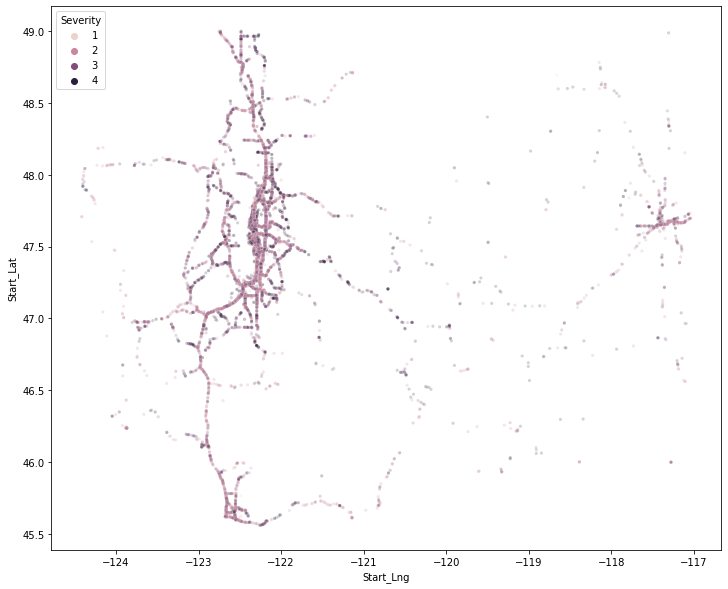

In [194]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x=dataset.Start_Lng, y=dataset.Start_Lat, hue='Severity', data=dataset, alpha=0.2, s=10)
pass

Математическое описание для каждого столбца

In [196]:
dataset.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000,6784.000000,22882.000000,12628.000000,22822.000000,22899.000000,22769.000000,20183.000000,12411.000000
mean,2.431932,47.463724,-122.192256,47.463510,-122.192128,0.470767,15425.121462,53.563098,48.442224,73.745465,29.912971,9.051302,7.228212,0.009085
std,0.743034,0.555145,0.920872,0.556139,0.920823,1.425860,39690.393115,12.971325,14.505389,19.489905,0.384188,2.287216,4.451361,0.028236
min,1.000000,45.559729,-124.413860,45.559810,-124.413860,0.000000,1.000000,-0.000000,-14.200000,8.000000,27.120000,0.000000,0.000000,0.000000
25%,2.000000,47.251880,-122.407771,47.252189,-122.410462,0.024000,1644.750000,45.000000,38.000000,60.000000,29.760000,10.000000,4.600000,0.000000
50%,2.000000,47.568550,-122.315960,47.568482,-122.316190,0.178000,6472.000000,53.000000,47.000000,77.000000,29.980000,10.000000,6.900000,0.000000
75%,3.000000,47.689298,-122.208920,47.689599,-122.208894,0.528000,14846.000000,62.100000,59.000000,89.000000,30.130000,10.000000,9.200000,0.000000
max,4.000000,49.000560,-117.041850,49.002140,-117.041230,61.085000,421369.000000,102.900000,98.000000,100.000000,30.810000,10.000000,38.000000,0.800000


По диаграмме выборка несбалансированная 


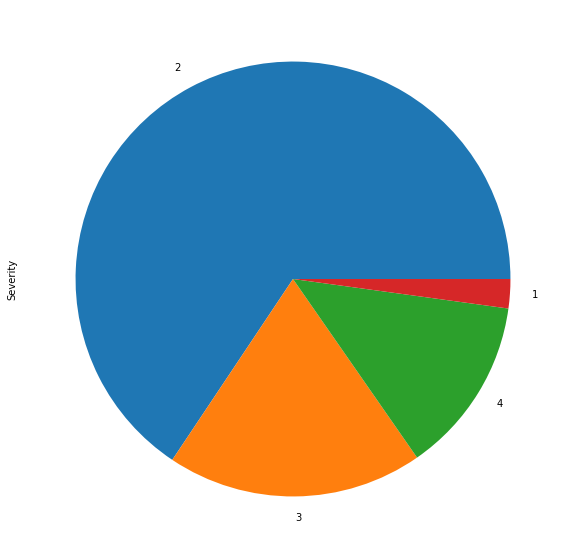

In [197]:
plt.subplots(figsize=(12, 10))
dataset.Severity.value_counts().plot.pie()
pass

Корреляционная матрица

In [198]:
vls = dataset.select_dtypes(include='float64')
vls.corr()

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Start_Lat,1.000000,0.116517,0.999631,0.116167,-0.068520,0.061057,-0.027342,-0.064771,-0.030314,-0.063972,0.019009,0.024142,-0.011095
Start_Lng,0.116517,1.000000,0.117031,0.999692,0.080923,-0.009113,-0.049604,-0.088051,-0.119949,-0.423974,-0.031785,-0.017736,-0.031823
End_Lat,0.999631,0.117031,1.000000,0.116662,-0.066905,0.060574,-0.027536,-0.065206,-0.030106,-0.063606,0.018968,0.023988,-0.011403
End_Lng,0.116167,0.999692,0.116662,1.000000,0.079308,-0.009383,-0.049547,-0.087910,-0.119708,-0.423951,-0.031636,-0.017397,-0.031598
Distance(mi),-0.068520,0.080923,-0.066905,0.079308,1.000000,0.043333,-0.041597,-0.058163,0.003847,-0.062468,-0.043417,0.004252,-0.007478
Number,0.061057,-0.009113,0.060574,-0.009383,0.043333,1.000000,-0.018563,-0.059164,0.037052,-0.086142,0.000483,0.008597,0.051515
Temperature(F),-0.027342,-0.049604,-0.027536,-0.049547,-0.041597,-0.018563,1.000000,0.988682,-0.630979,-0.017594,0.215852,0.055400,-0.116078
Wind_Chill(F),-0.064771,-0.088051,-0.065206,-0.087910,-0.058163,-0.059164,0.988682,1.000000,-0.539549,-0.126249,0.214731,-0.048861,-0.148127
Humidity(%),-0.030314,-0.119949,-0.030106,-0.119708,0.003847,0.037052,-0.630979,-0.539549,1.000000,-0.015269,-0.340901,-0.103602,0.254386
Pressure(in),-0.063972,-0.423974,-0.063606,-0.423951,-0.062468,-0.086142,-0.017594,-0.126249,-0.015269,1.000000,0.057291,-0.091363,-0.027668


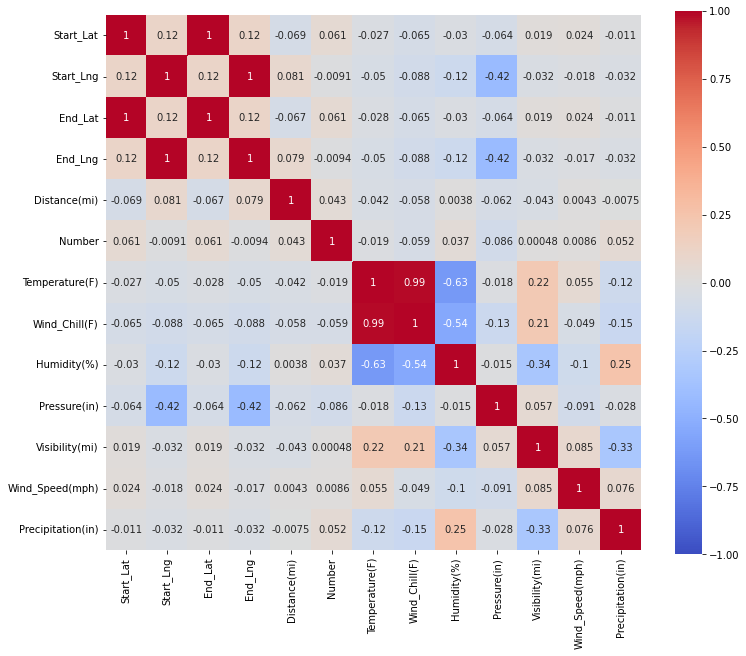

In [199]:
plt.subplots(figsize=(12, 10))
sns.heatmap(vls.corr(), square=True, annot=True, vmin = -1, vmax = 1, cmap='coolwarm')
pass

В таблице заметна высокая корреляция между :
1.   Start_Lat и End_Lat (показывают широту в GPS-координатах начальной и конечной точек)
2.   Start_Lng и End_Lng (показывает долготу в GPS-координатах начальной и конечной точек)
3. Temperature(F) и Wind_Chill(F) (показывают темературу и холод ветра(в Фаренгейтах))

И обратная между :
1.   (Start_Lng, End_Lng) и Pressure(in) (координаты и давление)
2.   Temperature(F) и Humidity(%) (температура и влажность)
3.   Humidity(%) и Wind_Chill(F) (влажность и температура ветра)
4.   Visibility(mi) и Precipitation(in) (видимость и осадки)

Определим наличие выбросов

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


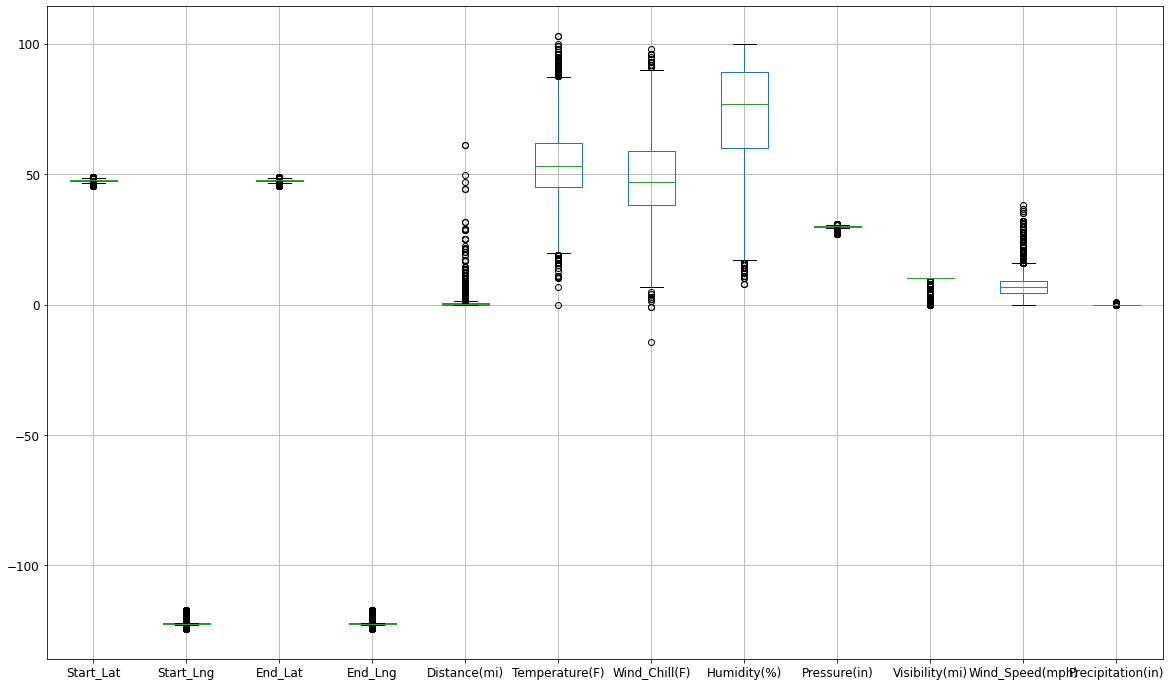

In [200]:
plt.figure(figsize = (20, 12))
vl = vls.drop(["Number"], axis=1)
vl.boxplot(fontsize = 12)
pass

Посмотрим на диаграммы рассеивания

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


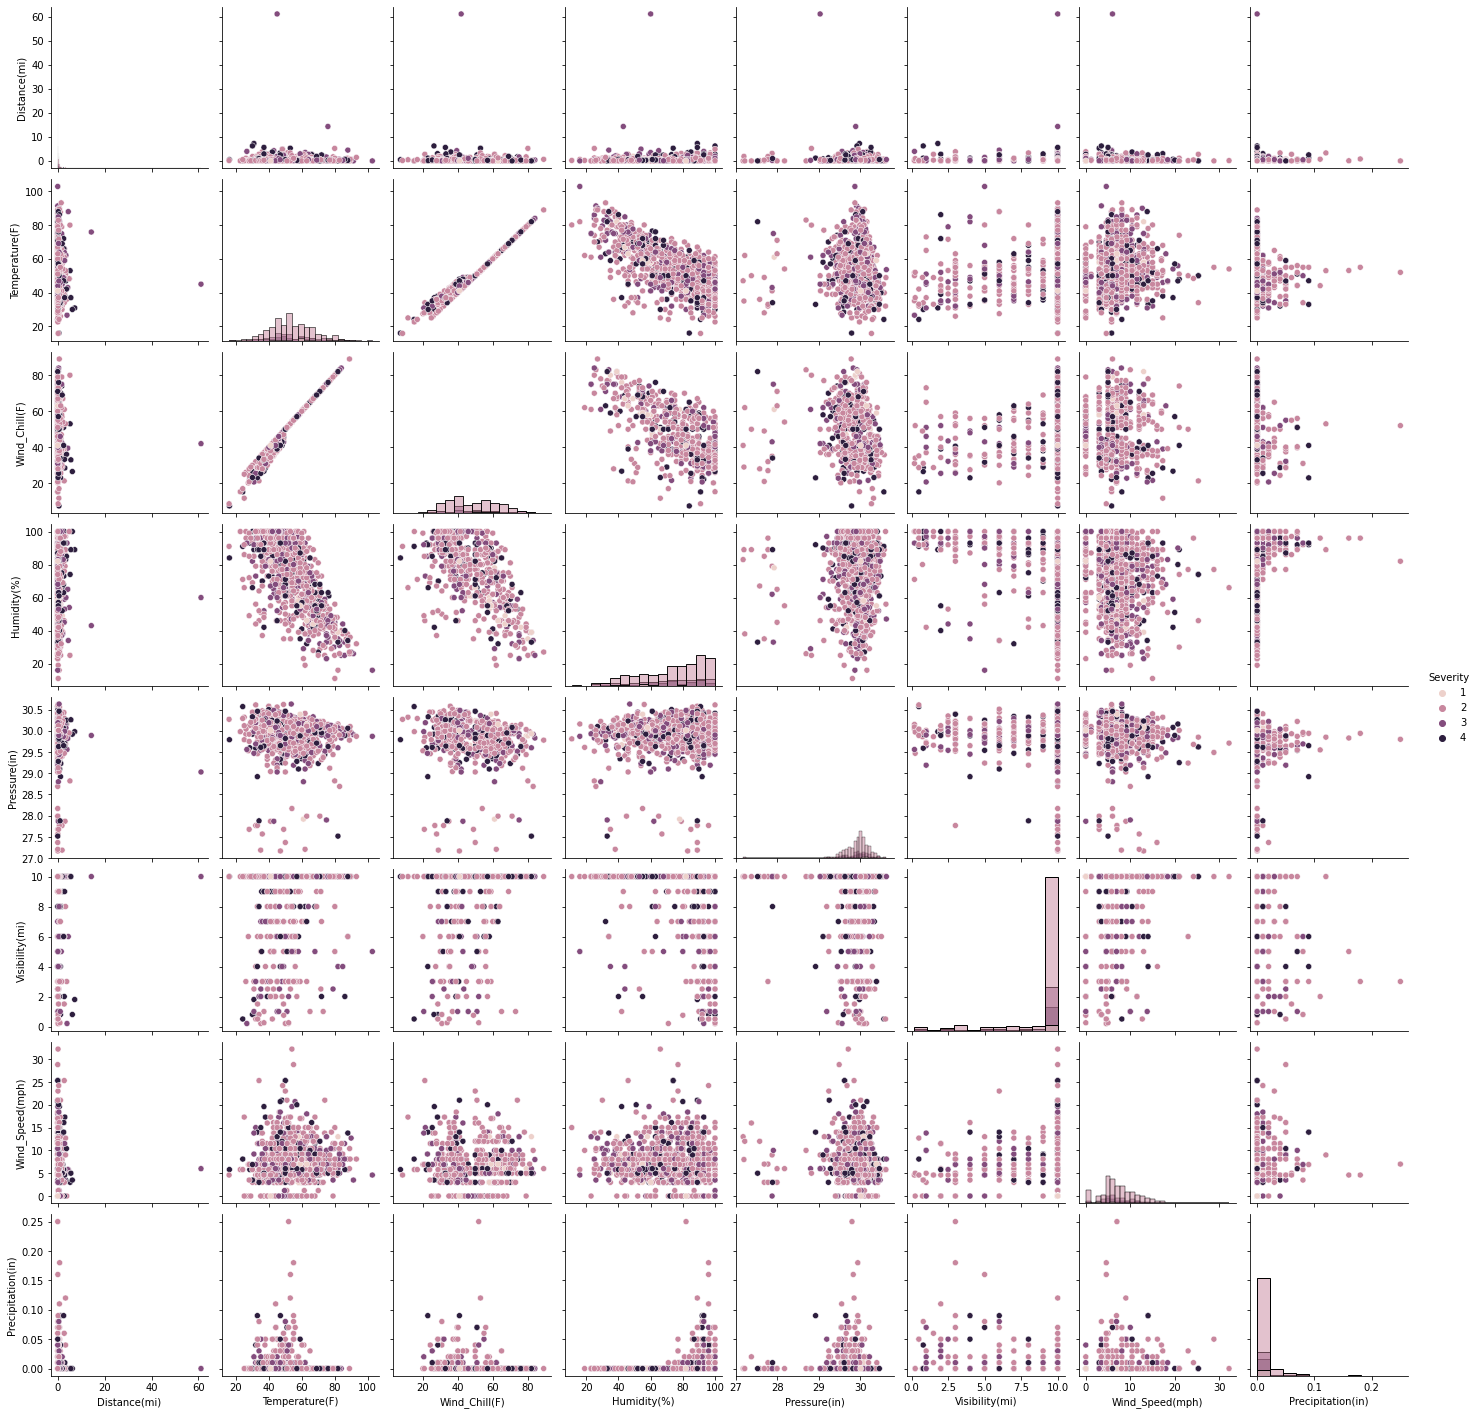

In [201]:
cols = [i for i in vls.columns]
cols.append('Severity')
dat = dataset[cols]
dat.drop(['Number', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], axis=1, inplace=True)
sns.pairplot(dat.sample(1000), hue='Severity', diag_kind='hist')
pass

На графиках можно определить верхнюю границу некоторых характеристик, видна линейная зависимость, есть равномерное распределение, которое стремится полностью заполнить доступное множество, а также выбросы

# Обработка пропущенных значений

Ранее уже определили наличие пропущенных значений, а в особенности Number, Wind_Chill(F), Precipitation(in)

In [202]:
dataset.isna().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  0
Number                   16215
Street                       0
Side                         0
City                         0
County                       0
State                        0
Zipcode                      8
Country                      0
Timezone                     8
Airport_Code                 9
Weather_Timestamp           73
Temperature(F)             117
Wind_Chill(F)            10371
Humidity(%)                177
Pressure(in)               100
Visibility(mi)             230
Wind_Direction             111
Wind_Speed(mph)           2816
Precipitation(in)        10588
Weather_Condition          194
Amenity                      0
Bump                         0
Crossing

Все пропущенные численные значения

In [203]:
vls.isna().sum()

Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Number               16215
Temperature(F)         117
Wind_Chill(F)        10371
Humidity(%)            177
Pressure(in)           100
Visibility(mi)         230
Wind_Speed(mph)       2816
Precipitation(in)    10588
dtype: int64

In [204]:
vls.median(axis=0)

Start_Lat              47.568550
Start_Lng            -122.315960
End_Lat                47.568482
End_Lng              -122.316190
Distance(mi)            0.178000
Number               6472.000000
Temperature(F)         53.000000
Wind_Chill(F)          47.000000
Humidity(%)            77.000000
Pressure(in)           29.980000
Visibility(mi)         10.000000
Wind_Speed(mph)         6.900000
Precipitation(in)       0.000000
dtype: float64

Замена медианой

In [205]:
vls.fillna(vls.median(axis=0), axis=0, inplace=True)
vls.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Number               0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64

Обновление набора данных

In [206]:
dataset.update(vls)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


Замена модой в наборе данных

In [207]:
dataset['Wind_Direction'].fillna(dataset['Wind_Direction'].mode().iloc[0], inplace=True)
dataset['Weather_Condition'].fillna(dataset['Weather_Condition'].mode().iloc[0], inplace=True)
dataset['Weather_Timestamp'].fillna(dataset['Weather_Timestamp'].mode().iloc[0], inplace=True)
dataset.dropna(inplace=True)
dataset.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [208]:
dataset.shape

(22990, 47)

In [211]:
vls = dataset.select_dtypes(include='float64')
vls.shape

(22990, 13)

Постараемся избавиться от выбросов

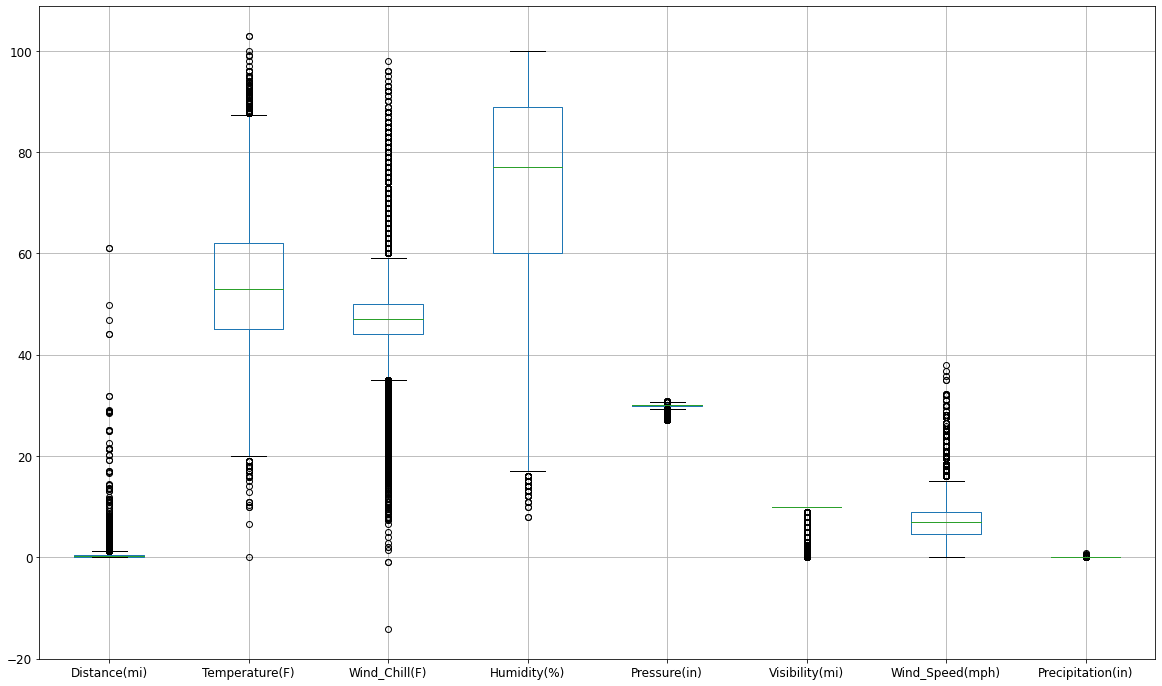

In [212]:
plt.figure(figsize = (20, 12))
vl = vls.drop(['Number', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], axis=1)
vl.boxplot(fontsize = 12)
pass

In [213]:
dataset['Distance(mi)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.000000
0.010    0.000000
0.050    0.000000
0.100    0.000000
0.500    0.178000
0.900    0.972000
0.950    1.704550
0.990    4.013750
0.995    5.530165
Name: Distance(mi), dtype: float64

In [214]:
dataset['Temperature(F)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    23.0
0.010    26.1
0.050    33.1
0.100    37.0
0.500    53.0
0.900    71.0
0.950    76.3
0.990    86.0
0.995    88.0
Name: Temperature(F), dtype: float64

In [215]:
dataset['Wind_Chill(F)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    17.0
0.010    21.0
0.050    30.1
0.100    35.2
0.500    47.0
0.900    62.0
0.950    68.0
0.990    79.0
0.995    82.0
Name: Wind_Chill(F), dtype: float64

In [216]:
dataset['Visibility(mi)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.25
0.010     0.50
0.050     3.00
0.100     5.00
0.500    10.00
0.900    10.00
0.950    10.00
0.990    10.00
0.995    10.00
Name: Visibility(mi), dtype: float64

In [217]:
dataset['Wind_Speed(mph)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     3.0
0.500     6.9
0.900    12.7
0.950    15.0
0.990    21.0
0.995    23.0
Name: Wind_Speed(mph), dtype: float64

Удалим все строки таблицы, в которых `Visibility(mi)` или `Distance(mi)` или `Wind_Speed(mph)` или `Temperature(F)` выходят за пределы квантилей  0.005 ,  0.995 .

In [218]:
rows_to_drop = dataset[
    (dataset['Visibility(mi)']  < dataset['Visibility(mi)'].quantile(0.005))   | (dataset['Visibility(mi)']  > dataset['Visibility(mi)'].quantile(0.995)) |
    (dataset['Distance(mi)']  < dataset['Distance(mi)'].quantile(0.005))       | (dataset['Distance(mi)']  > dataset['Distance(mi)'].quantile(0.995)) |
    (dataset['Wind_Speed(mph)']  < dataset['Wind_Speed(mph)'].quantile(0.005)) | (dataset['Wind_Speed(mph)']  > dataset['Wind_Speed(mph)'].quantile(0.995)) |
    (dataset['Temperature(F)']  < dataset['Temperature(F)'].quantile(0.005))   | (dataset['Temperature(F)']  > dataset['Temperature(F)'].quantile(0.995)) |
    (dataset['Wind_Chill(F)']  < dataset['Wind_Chill(F)'].quantile(0.005))   | (dataset['Wind_Chill(F)']  > dataset['Wind_Chill(F)'].quantile(0.995)) 
].index
dataset.drop(rows_to_drop, inplace=True)
dataset.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(22374, 47)

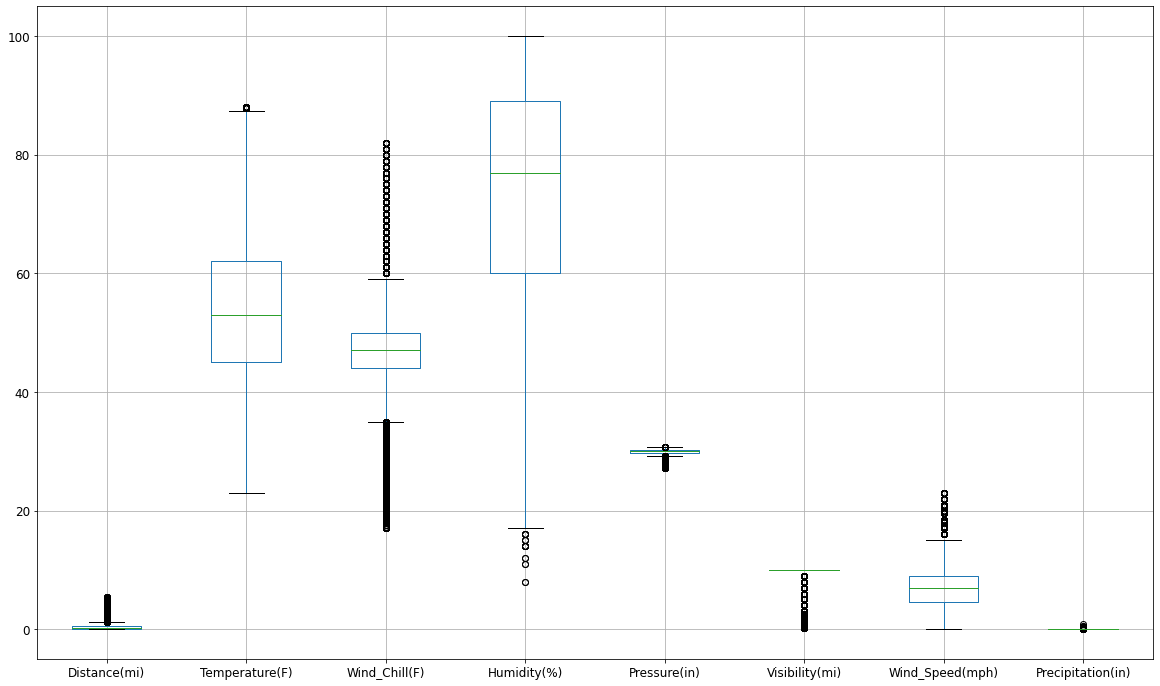

In [219]:
vls = dataset.select_dtypes(include='float64')
plt.figure(figsize = (20, 12))
vl = vls.drop(['Number', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], axis=1)
vl.boxplot(fontsize = 12)
pass

# Категориальные признаки

In [220]:
names = []
for i in dataset.columns :
  if(dataset[i].dtype.name == 'object') :
      names.append(i)

names

['ID',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [221]:
categorical = [
    'Side',
    'Wind_Direction',
    'Weather_Condition',
    'Sunrise_Sunset',
    'Civil_Twilight',
    'Nautical_Twilight',
    'Astronomical_Twilight',
]

data_categorical = pd.get_dummies(dataset[categorical])
data_categorical

,Side_L,Side_R,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,...,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Wintry Mix,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
110980,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
110990,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
111012,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
111037,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
111082,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515912,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1515930,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1515941,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1515986,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


Большинство аварий происходит днем, когда нет осадков и безветренная погода

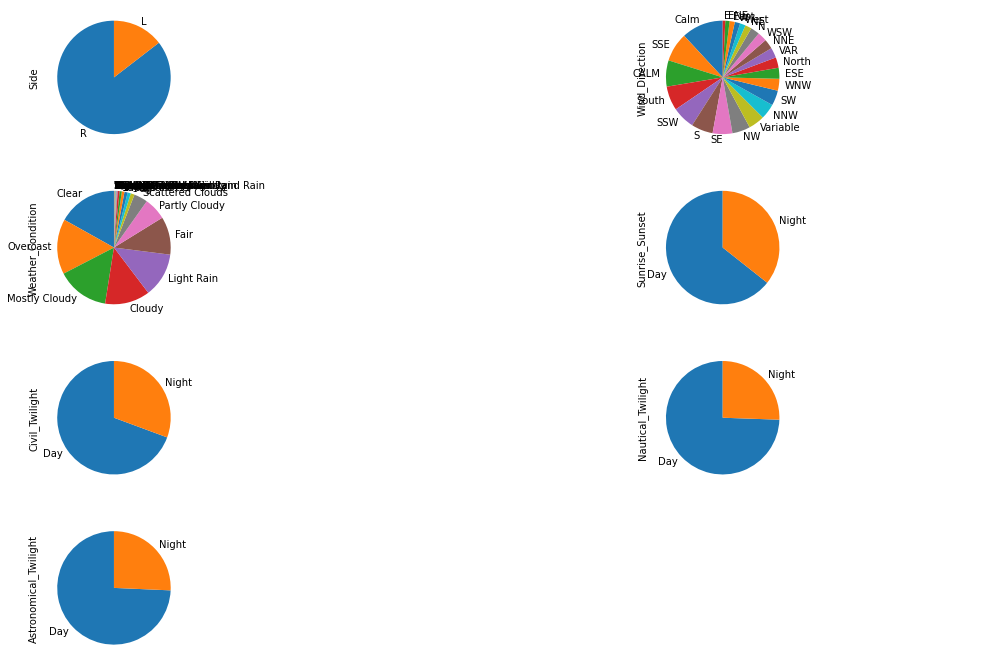

In [222]:
_, a = plt.subplots((len(categorical) + 1) // 2, 2, figsize=(20, 12))
for i, col in enumerate(categorical):
    dataset[col].value_counts().plot(kind='pie', subplots=True, ax=a[i // 2, i % 2], startangle=90)
a[-1, -1].axis('off');

# Нормализация

Воспользуемся стандартным способом - линейным преобразованием, приводящем все значения к нулевому среднему и единичному среднеквадратичному отклонению


In [223]:
norm = (vls - vls.mean(axis = 0)) / vls.std(axis = 0)
norm.describe()

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04,2.237400e+04
mean,-2.148841e-14,-2.050901e-14,-4.522271e-15,4.973228e-15,-5.684596e-17,2.731147e-17,2.235729e-16,-1.625985e-16,-1.778421e-16,3.556842e-16,-7.596399e-16,-2.515196e-16,-2.540602e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.470268e+00,-2.544761e+00,-3.463719e+00,-2.545100e+00,-6.182750e-01,-4.125954e-01,-2.485592e+00,-3.023136e+00,-3.473531e+00,-7.496477e+00,-4.026710e+00,-1.791713e+00,-2.316711e-01
25%,-3.784895e-01,-2.170969e-01,-3.774233e-01,-2.195926e-01,-5.826146e-01,-1.180152e-01,-6.973521e-01,-3.789731e-01,-7.386338e-01,-3.964573e-01,4.070279e-01,-6.293482e-01,-2.316711e-01
50%,1.880461e-01,-1.122341e-01,1.867138e-01,-1.126098e-01,-3.469457e-01,-1.180152e-01,-4.708304e-02,-8.517725e-02,1.554671e-01,1.929783e-01,4.070279e-01,-4.816589e-02,-2.316711e-01
75%,4.016256e-01,6.838850e-03,4.040304e-01,8.280053e-03,1.910616e-01,-1.180152e-01,6.844697e-01,2.086186e-01,7.865972e-01,5.680736e-01,4.070279e-01,4.824788e-01,-2.316711e-01
max,2.790119e+00,6.006673e+00,2.788673e+00,6.007430e+00,7.898365e+00,1.876940e+01,2.797844e+00,3.342441e+00,1.365133e+00,2.336380e+00,4.070279e-01,4.020110e+00,3.730547e+01


# Обучающая и тестовая выборки

Соберем таблицу из `categorical`, `bool` и `float64` данных (за исключением `Severity`) для x

Разобьем данные на обучающую и тестовую выборки в соотношении 9:1

In [224]:
objct = []
flt = []
bl = []
for i in dataset.columns :
  if(dataset[i].dtype.name == 'object') : objct.append(i)  
  if(dataset[i].dtype.name == 'float64') : flt.append(i)
  if(dataset[i].dtype.name == 'bool') : bl.append(i)

x = pd.concat((data_categorical, norm, dataset[bl]), axis = 1)
y = dataset['Severity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 71)

train, _ = x_train.shape 
test,  _ = x_test.shape 

train, test

(20136, 2238)

## KNN


In [225]:
%%time
g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(x_train, y_train)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.33472394258319405
Оптимальное количество соседей:  14
CPU times: user 5min 21s, sys: 21.3 s, total: 5min 42s
Wall time: 4min 24s


In [226]:
%%time
knn = KNeighborsClassifier(n_neighbors = g.best_estimator_.n_neighbors).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != knn.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test != knn.predict(x_test))}")

Ошибка на обучающей выборке: 0.31356773937226856
Ошибка на тестовой выборке: 0.3261840929401251
CPU times: user 16.3 s, sys: 2.5 s, total: 18.8 s
Wall time: 16.1 s


In [227]:
print(f"Точность на обучающей выборке: {accuracy_score(y_true=y_train, y_pred=knn.predict(x_train))}")
print(f"Точность на тестовой выборке: {accuracy_score(y_true=y_test, y_pred=knn.predict(x_test))}")

Точность на обучающей выборке: 0.6864322606277314
Точность на тестовой выборке: 0.6738159070598749


## SVC

In [228]:
%%time
svc = SVC(gamma='auto').fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != svc.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test != svc.predict(x_test))}")

Ошибка на обучающей выборке: 0.33303535955502583
Ошибка на тестовой выборке: 0.33065236818588023
CPU times: user 2min 16s, sys: 581 ms, total: 2min 16s
Wall time: 2min 17s


## Random Forest


In [229]:
%%time
rf = ensemble.RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != rf.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test != rf.predict(x_test))}")

Ошибка на обучающей выборке: 0.0032777115613825984
Ошибка на тестовой выборке: 0.26005361930294907
CPU times: user 6.49 s, sys: 29.2 ms, total: 6.52 s
Wall time: 6.53 s


## Extra Trees

In [230]:
%%time
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != ert.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test  != ert.predict(x_test))}")

Ошибка на обучающей выборке: 0.0032280492649980133
Ошибка на тестовой выборке: 0.27479892761394104
CPU times: user 6.69 s, sys: 248 ms, total: 6.94 s
Wall time: 6.93 s


## Adaptive Boost

In [231]:
%%time
ada = ensemble.AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != ada.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test  != ada.predict(x_test))}")

Ошибка на обучающей выборке: 0.3662097735399285
Ошибка на тестовой выборке: 0.3605898123324397
CPU times: user 29.2 s, sys: 119 ms, total: 29.3 s
Wall time: 31 s


## Gradient Boosting

In [232]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators=100).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != gbt.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test  != gbt.predict(x_test))}")

Ошибка на обучающей выборке: 0.3037842669845054
Ошибка на тестовой выборке: 0.3109919571045576
CPU times: user 32.9 s, sys: 48.4 ms, total: 33 s
Wall time: 32.8 s


# Сравнение результатов

При помощи алгоритма `KNN` на оптимальном количестве соседей в диапазоне от 1 до 30 ошибка выборки достигла до 33%. При возможности использования большего диапазона количество соседей могло быть другим, что привело бы к другим значениям ошибки, но за это потребуется заплатить временем поиска

Сравнение результатов группы классификации
* Наилучший результат по ошибкам достиг `Random Forest` до 26%.
* `Random Forest` и `Extra Trees` лучше `KNN` по двум параметрам точность и скорость
* `Gradient Boosting` и `SVC` в данном случае имеют приблизительно похожий шанс на ошибку
* Все алгоритмы показывают относительно быстрый результат, но за счет того, что `KNN` перед началом выполнения работы находит оптимальное количество соседней не за короткий промежуток времени, это и есть главный минус `KNN`, поэтому для оптимальности лучше знать заранее сколько нужно использовать соседей
* `Adaptive Boost` менее точный 

# Несбалансированность классов

In [233]:
x_train_und, x_test_und, y_train_und, y_test_und = train_test_split(x, y, test_size=0.1, random_state=71)
rus = RandomUnderSampler()
x_train_und, y_train_und = rus.fit_resample(x_train_und, y_train_und)

In [234]:
%%time
g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(x_train_und, y_train_und)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.5421447068306151
Оптимальное количество соседей:  26
CPU times: user 10.1 s, sys: 7.1 s, total: 17.2 s
Wall time: 8.95 s


In [235]:
%%time
knn = KNeighborsClassifier(n_neighbors = g.best_estimator_.n_neighbors).fit(x_train_und, y_train_und)

print(f"Ошибка на обучающей выборке: {np.mean(y_train_und != knn.predict(x_train_und))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test_und != knn.predict(x_test_und))}")

Ошибка на обучающей выборке: 0.48302107728337235
Ошибка на тестовой выборке: 0.6206434316353887
CPU times: user 615 ms, sys: 235 ms, total: 849 ms
Wall time: 552 ms


In [236]:
x_train_ov, x_test_ov, y_train_ov, y_test_ov = train_test_split(x, y, test_size=0.1, random_state=71)
ros = RandomOverSampler()
x_train_ov, y_train_ov = ros.fit_resample(x_train_ov, y_train_ov)

In [237]:
%%time
g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(x_train_ov, y_train_ov)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.07704845541184402
Оптимальное количество соседей:  1
CPU times: user 35min 29s, sys: 1min 39s, total: 37min 8s
Wall time: 28min 43s


In [238]:
%%time
knn = KNeighborsClassifier(n_neighbors = g.best_estimator_.n_neighbors).fit(x_train_ov, y_train_ov)

print(f"Ошибка на обучающей выборке: {np.mean(y_train_ov != knn.predict(x_train_ov))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test_ov != knn.predict(x_test_ov))}")

Ошибка на обучающей выборке: 0.004356643881919928
Ошибка на тестовой выборке: 0.3516532618409294
CPU times: user 1min 3s, sys: 3.64 s, total: 1min 7s
Wall time: 45.4 s


В итоге избавления от несбалансированности классов методом RandomUnderSampler ошибка увеличилась до 62%, это связано с тем, что в первом классе относительно мало данных, следовательно применение этого метода не рекомендауется для решения данной задачи

При использовании RandomOverSampler время поиска оптимального количества соседей во много раз увеличивается, но точность незначительно падает

# Исключение коррелированных переменных


Для уменьшения времени выполнения работы классификатора имеет смысл исключить коррелированные переменные, они представляют одну информацию для модели, но обрабатываются все

In [239]:
x.shape

(22374, 97)

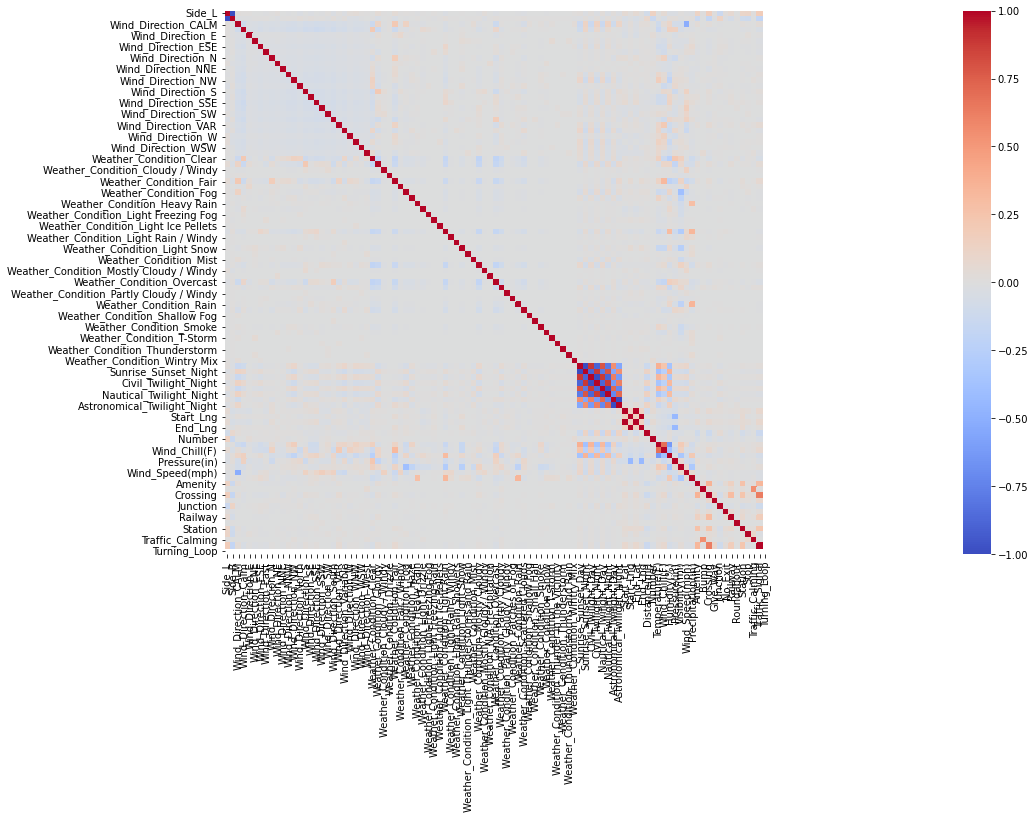

In [240]:
plt.subplots(figsize=(70, 10))
sns.heatmap(x.corr(), square=True, vmin = -1, vmax = 1, cmap='coolwarm')
pass

In [241]:
new_data = pd.DataFrame(data = x)
corr_mat = new_data.corr()
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Start_Lng                End_Lng                        0.999935
Start_Lat                End_Lat                        0.999876
Sunrise_Sunset_Day       Civil_Twilight_Day             0.890528
Sunrise_Sunset_Night     Civil_Twilight_Night           0.890528
Civil_Twilight_Day       Nautical_Twilight_Day          0.881586
Civil_Twilight_Night     Nautical_Twilight_Night        0.881586
Sunrise_Sunset_Night     Nautical_Twilight_Night        0.787218
Sunrise_Sunset_Day       Nautical_Twilight_Day          0.787218
Nautical_Twilight_Night  Astronomical_Twilight_Night    0.711443
Nautical_Twilight_Day    Astronomical_Twilight_Day      0.711443
Temperature(F)           Wind_Chill(F)                  0.685883
Crossing                 Traffic_Signal                 0.625689
Civil_Twilight_Night     Astronomical_Twilight_Night    0.623192
Civil_Twilight_Day       Astronomical_Twilight_Day      0.623192
Bump                     Traffic_Calming                0.554589
Sunrise_Sunset_Night     

Удаляем коррелированные переменные в соответствии с корреляционной матрицей

In [242]:
x_update = x.drop(['End_Lng', 'End_Lat', 'Civil_Twilight_Day', 'Civil_Twilight_Night', 'Nautical_Twilight_Day', 'Nautical_Twilight_Night',
                   'Nautical_Twilight_Day', 'Astronomical_Twilight_Night', 'Astronomical_Twilight_Day', 'Wind_Chill(F)', 'Traffic_Signal',
                   'Traffic_Calming'], axis=1)
x_update.shape

(22374, 86)

Протестируем на KNN

In [243]:
x_train_update, x_test_update, y_train_update, y_test_update = train_test_split(x_update, y, test_size = 0.1, random_state = 71)

train, _ = x_train_update.shape 
test,  _ = x_test_update.shape 

train, test

(20136, 2238)

In [244]:
%%time
g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(x_train_update, y_train_update)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.3331345961926805
Оптимальное количество соседей:  14
CPU times: user 4min 52s, sys: 20.6 s, total: 5min 13s
Wall time: 4min 2s


In [245]:
%%time
knn = KNeighborsClassifier(n_neighbors = g.best_estimator_.n_neighbors).fit(x_train_update, y_train_update)

print(f"Ошибка на обучающей выборке: {np.mean(y_train_update != knn.predict(x_train_update))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test_update != knn.predict(x_test_update))}")

Ошибка на обучающей выборке: 0.31371672626142233
Ошибка на тестовой выборке: 0.3239499553172475
CPU times: user 14.7 s, sys: 1.3 s, total: 16 s
Wall time: 12.8 s


Ускорение при исключении коррелированных переменных достичь все таки получилось, почти на 20 секунд при поиске оптимального количества соседей и на 4 секунды при определении ошибки, а также ошибка на тестовой выборке почти не изменилась, как и ожидалось

# Общие выводы

В ходе выполнения домашнего задания было изучено, освоено и использовано :
* библиотеки машинного обучения, анализа данных и графики `sklearn`, `pandas`, `numpy`, `seaborn`, `matplotlib`  и `imblearn`
* обработка набора данных : чтение, визуализация, вычисление основных характеристик, пропущенные значения, выбросы, категориальные признаки, нормализация, обучение и многое другое 
* использованы классификаторы : `KNN`, `SVC`, `Random Forest`, `Exstra Trees`, `Adaptive Boost`, `Gradient Boosting`
* устранение несбалансированности классов